<a href="https://colab.research.google.com/github/KNandini12/Credit-card-Fraud-Detection/blob/main/Credit_Card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                                Credit Card Fraud Detection

**Problem statement:-**
The aim of the project is to predict fraudulent credit card transactions using machine learning models.

Though the Credit cards can be a convenient way to manage your finances, they can also be risky. Credit card fraud is the unauthorized use of someone else's credit card or credit card information to make purchases or withdraw cash. It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.


**Understand the Dataset**
* This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly imbalanced, the positive class (frauds) account for 0.172% of all transactions.
* Most of the features (V1, V2, V3, ... V28) have no explicit information that we can feature engineering due to confidentiality issues.
* Except for "time" and "amount," all features had been scaled.
* Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise..
* Most of the transactions, as expected, are non-fraudulent. Non-frauds make 99.83% of the dataset, and frauds only make 0.17% of the dataset. They are extremely imbalanced.







In [ ]:
#Importing the libraries

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
import datetime
from datetime import date

In [ ]:
#Importing Dataset

data=pd.read_csv('credit_card.csv')

In [ ]:
#Understanding the basic structure of the data with head, shape, info, and describe.

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#shape of the dataset

shape=data.shape

print("Number of rows in the dataset are : {}".format(shape[0]))
print("Number of columns in the dataset are : {}".format(shape[1]))

Number of rows in the dataset are : 284807
Number of columns in the dataset are : 31


In [ ]:
#Dataset information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#statistical summary of the data

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.759061e-12,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,-8.251130e-13,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-9.654937e-13,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,8.321385e-13,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,1.649999e-13,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,4.248366e-13,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-3.054600e-13,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,8.777971e-14,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-1.179749e-12,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [ ]:
#missing values check

null=pd.DataFrame(data.isnull().sum(),columns=['Null Values'])
null['Missing values %']=(data.isna().sum()/len(data)*100)
null=null[null['Missing values %']>0]
null.style.background_gradient(cmap='virdis',low=0.2,high=0.1)

,Null Values,Missing values %


There are no missing values in the data

In [ ]:
# Imbalance in the data

# Time to explain the data we are dealing with.

# Determine number of fraud cases in dataset
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction =(len(fraud)/float(len(valid)))
print(outlierFraction)
print('Fraud Cases: {}'.format(round(len(data[data['Class'] == 1]))))
print('Valid Transactions: {}'.format(round(len(data[data['Class'] == 0]))))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


     Only 0.17% fraudulent transaction out of all the transactions. The data is highly imbalanced.

# EDA

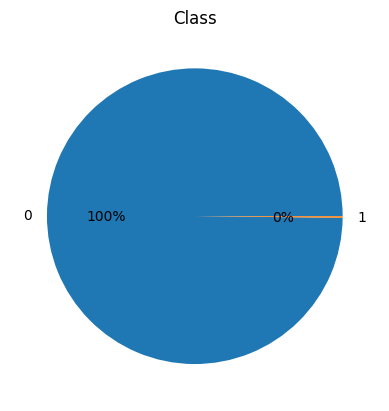

In [ ]:
# Plot the occurrences of fraud and valid transactions by pie chart
target_var=pd.crosstab(index=data['Class'],columns='% observations')
plt.pie(target_var['% observations'],labels=target_var['% observations'].index,autopct='%.0f%%')
plt.title('Class')
plt.show()

The distribution is heavily skewed towards non-fraud

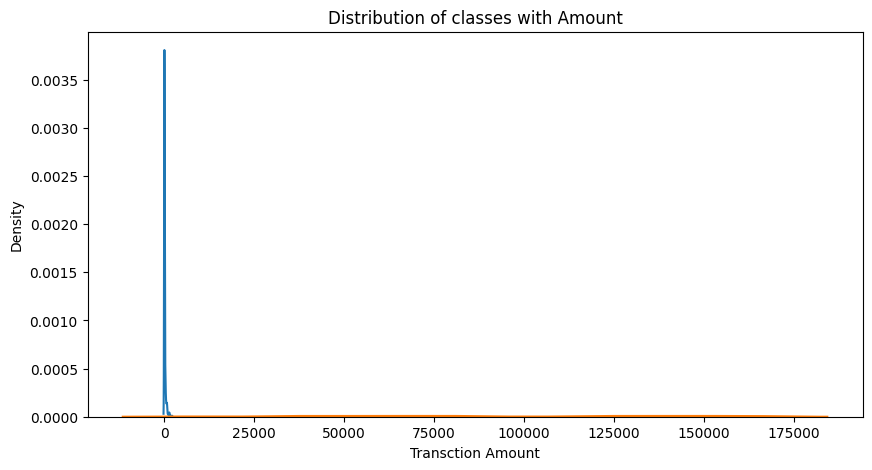

In [ ]:
# Distribution plot
plt.figure(figsize=(10,5))
ax = sns.distplot(fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(valid['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.title("Distribution of classes with Amount")
plt.show()

We can see that the fraudulent transctions are mostly densed in the lower range of amount, whereas the non-fraudulent transctions are spreaded throughout low to high range of amount.

<Axes: xlabel='Time', ylabel='Count'>

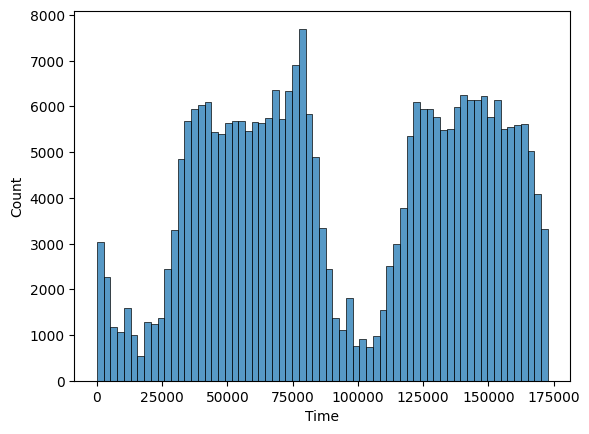

In [ ]:
sns.histplot(data=data['Time'])

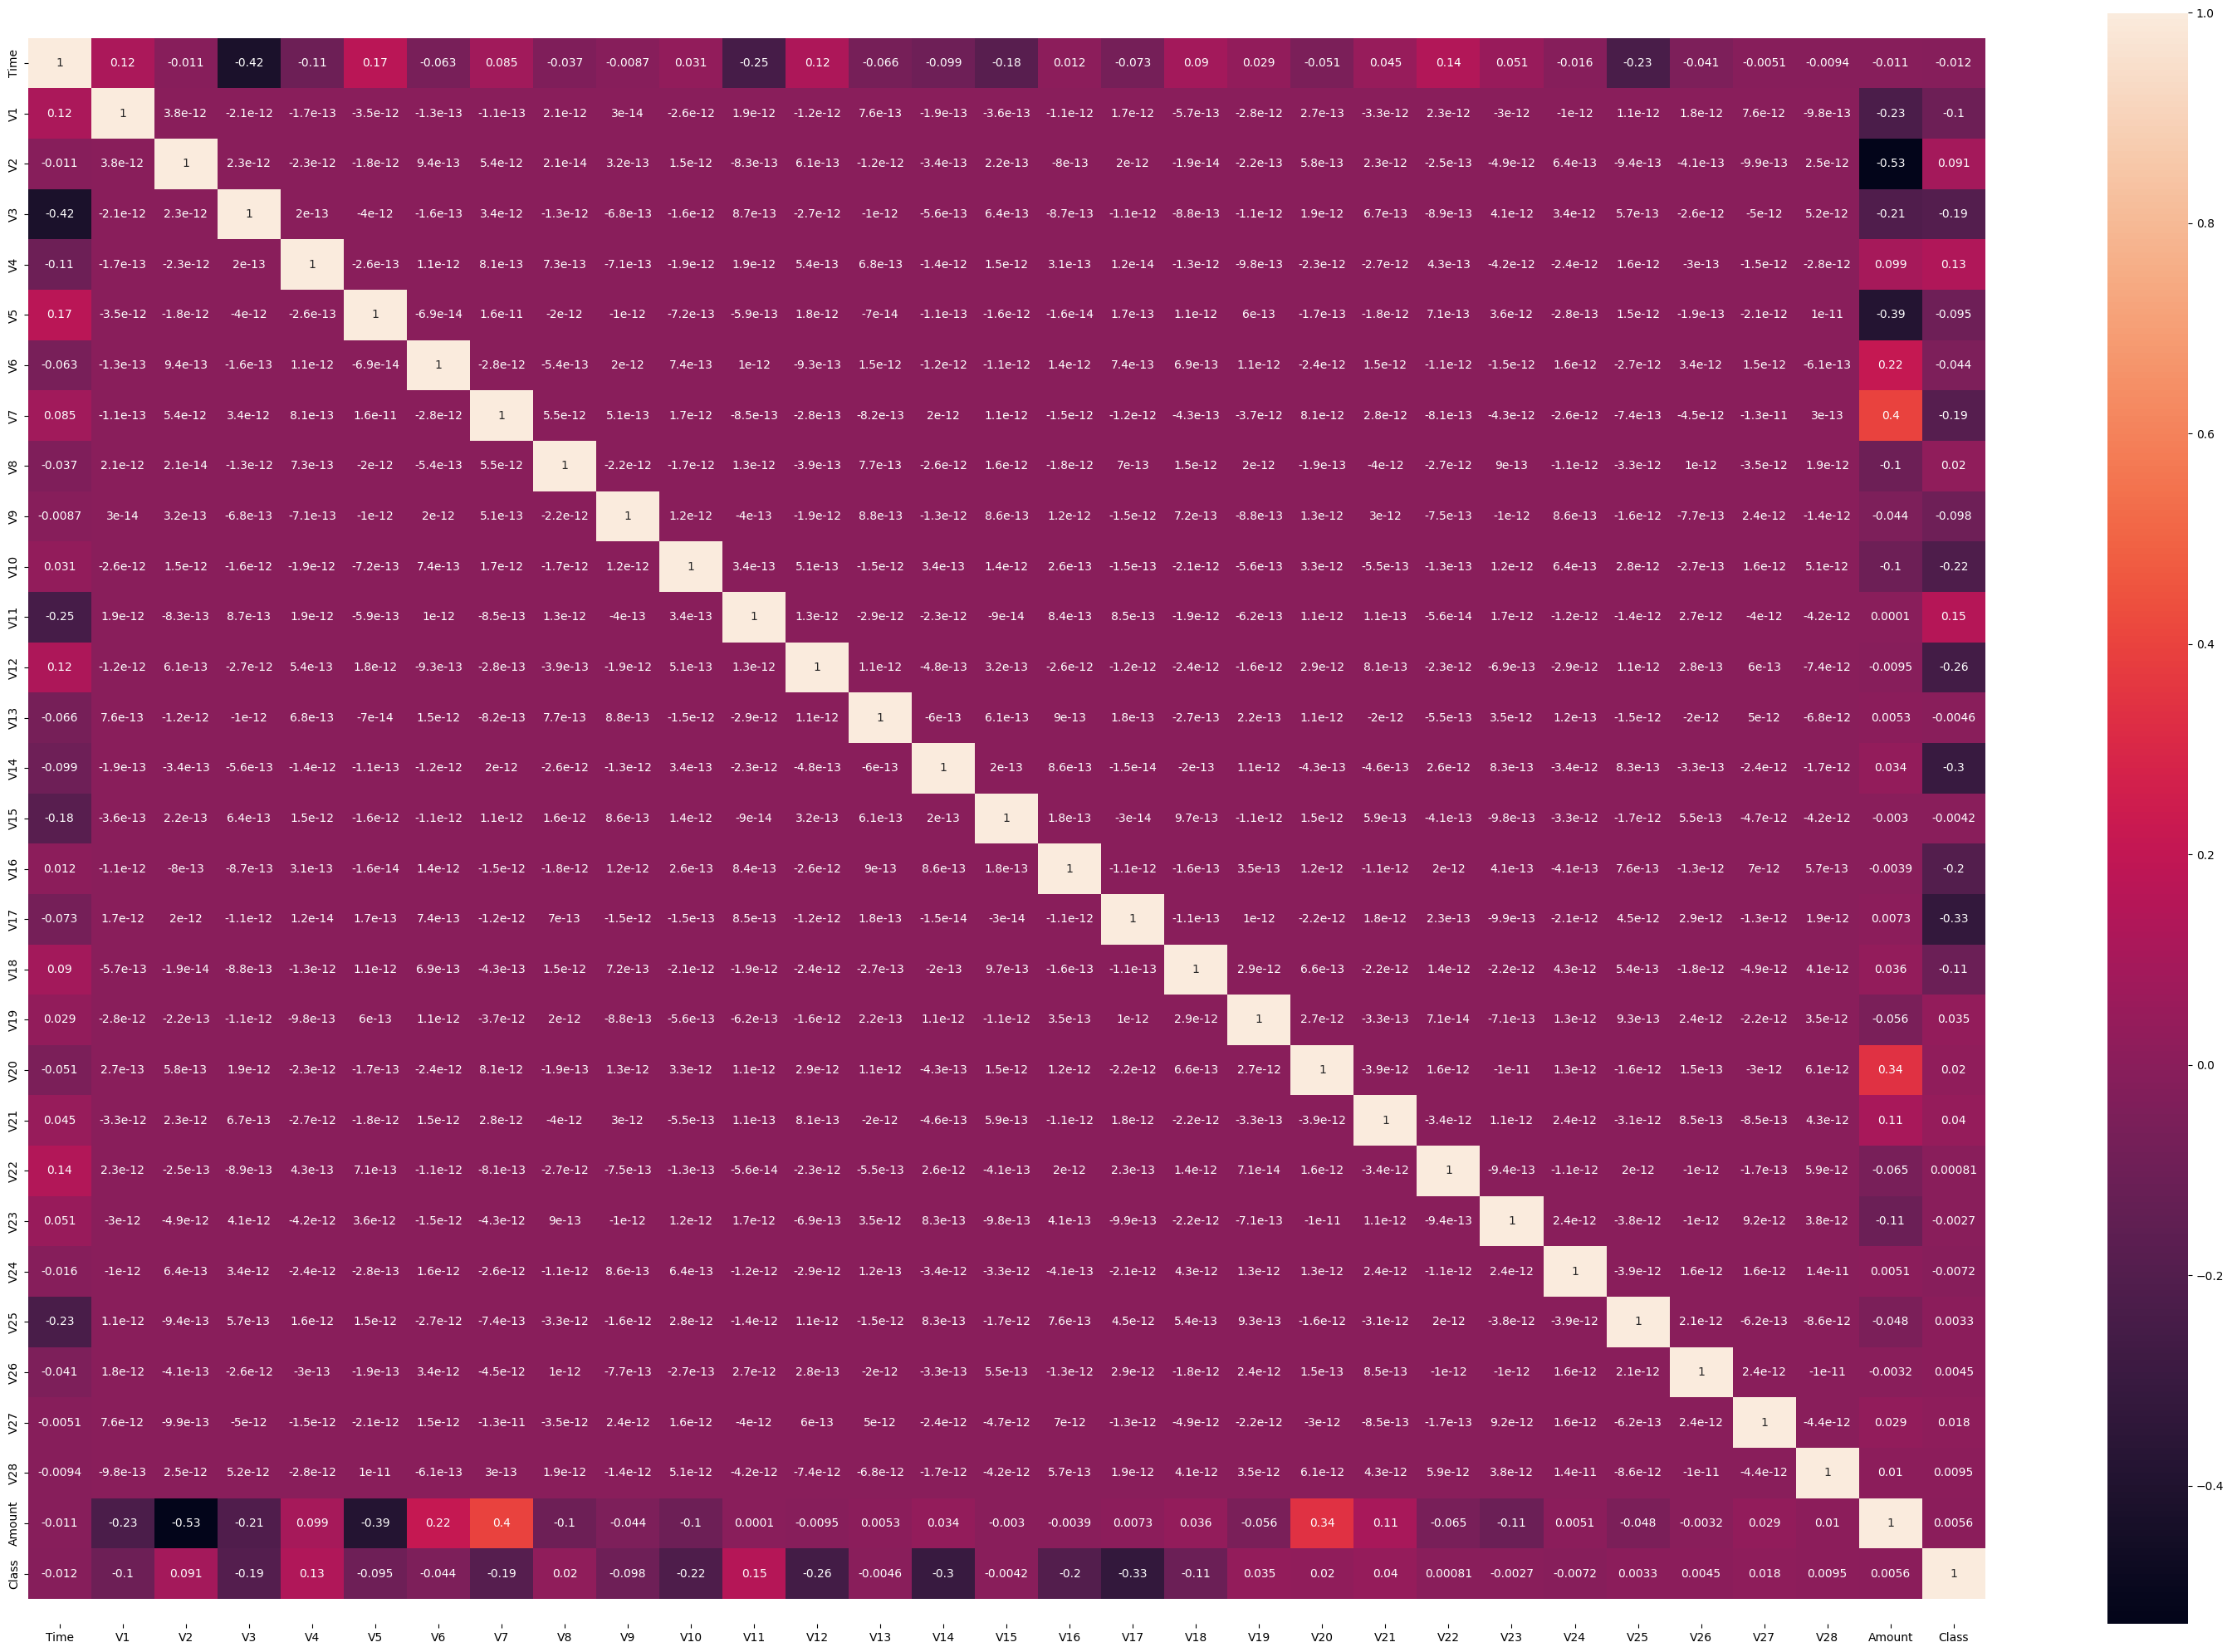

In [ ]:
# Correlation matrix
plt.figure(figsize=(30,20))
ax=sns.heatmap(data=data.corr(),annot=True)

bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.tight_layout()

In the HeatMap we can clearly see that most of the features do not correlate to other features but there are some features that either has a positive or a negative correlation with each other. For example, V2 and V5 are highly negatively correlated with the feature called Amount. We also see some correlation with V20 and Amount. This gives us a deeper understanding of the Data available to us.

# Outlier check

Outliers treatment
We are not performing any outliers treatment for this particular dataset. Because all the columns except for 'Time'and 'Amount' are already PCA transformed.

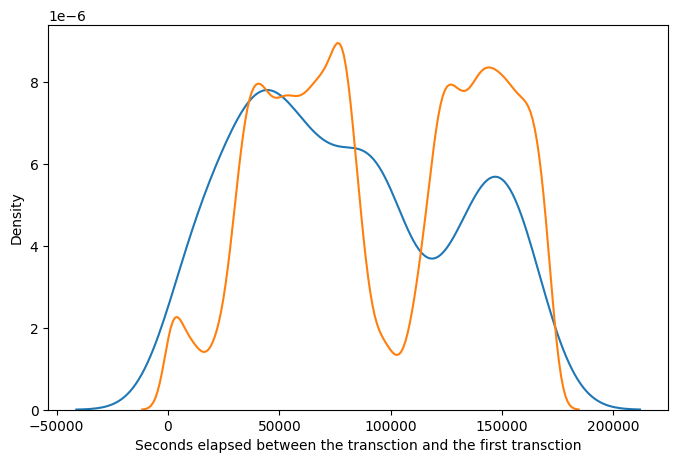

In [ ]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(valid['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

We do not see any specific pattern for the fraudulent and non-fraudulent transctions with respect to Time. Hence, we can drop the Time column.

In [ ]:
# Drop the Time column
data.drop('Time', axis=1, inplace=True)

# Train Test Split

In [ ]:
# Import library
from sklearn.model_selection import train_test_split

X=data.drop(['Class'],axis=1)

In [ ]:
y=data['Class']

In [ ]:
# Splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

## Applying SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Before SMOTE
class_counts_before = y_train.value_counts()
class_counts_before

0    227451
1       394
Name: Class, dtype: int64

In [ ]:
# After SMOTE
class_counts_after = y_train_resampled.value_counts()
class_counts_after

0    227451
1    227451
Name: Class, dtype: int64

Visualizing the Class Distribution

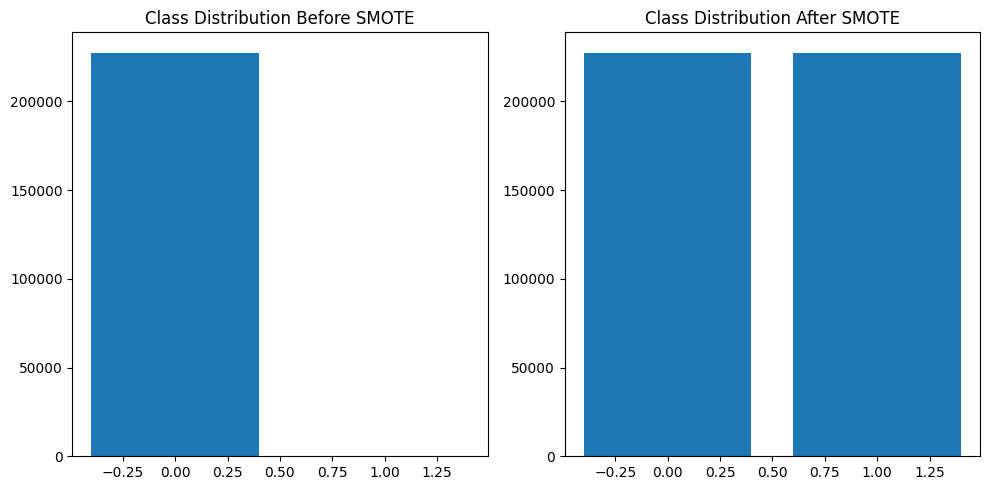

In [ ]:
import matplotlib.pyplot as plt

# Plot the class distribution before SMOTE
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(class_counts_before.index, class_counts_before.values)
plt.title("Class Distribution Before SMOTE")

# Plot the class distribution after SMOTE
plt.subplot(1, 2, 2)
plt.bar(class_counts_after.index, class_counts_after.values)
plt.title("Class Distribution After SMOTE")

plt.tight_layout()
plt.show()

## Feature Scaling

We need to scale only the Amount column as all other columns are already scaled by the PCA transformation.

In [ ]:
# Standardization method

from sklearn.preprocessing import StandardScaler

In [ ]:
# Instantiate the Scaler

scaler = StandardScaler()

In [ ]:
# Fit the data into scaler and transform

# Fit the data into scaler and transform
X_train_resampled['Amount'] = scaler.fit_transform(X_train_resampled[['Amount']])

In [ ]:
X_train_resampled.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,-0.030441,0.624996,1.691496,1.255790,-0.253266,-0.331695,0.307252,-0.930844,0.651666,0.167987,-0.125390,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,-0.369760
1,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,0.611115,-1.945070,-0.726597,1.060888,-1.193347,0.631053,-0.160123,-1.630444,2.106866,-1.692780,-0.470372,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,-0.221095
2,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,-0.638222,0.521931,-0.072768,-1.008237,-0.640249,-0.801946,0.678131,0.044374,0.521919,0.198772,0.012227,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,-0.361480
3,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,0.560595,-0.855437,-4.179628,0.286872,1.271254,-1.011647,1.458600,-0.613260,0.814931,-2.147124,-0.253757,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,0.075075
4,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,1.221746,0.472626,1.595929,0.777603,0.187685,-1.060579,0.143332,0.007803,-0.055817,0.712695,-0.012320,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,-0.304473


In [ ]:
# Transform the test set

#We don't fit scaler on the test set. We only transform the test set.

X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,5.299236,-10.834006,1.671120,-9.373859,0.360806,-9.899247,-19.236292,-8.398552,3.101735,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,1.096602
49906,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,-0.087670,0.979427,0.076883,-0.217884,-0.136830,-2.142892,0.126956,1.752662,0.432546,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,1.742140
29474,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,0.543827,0.112453,1.075384,-0.245772,0.180483,1.769860,-0.533172,-0.533300,1.192245,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,-0.282780
276481,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,-1.328335,0.223621,1.132627,-0.550875,0.616568,0.497974,0.502195,0.981343,0.101264,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,-0.404908
278846,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,0.942162,0.850038,-0.616166,0.592634,-0.603845,0.091077,-0.471867,-0.333816,0.404711,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,-0.407433


## Skewness

In [ ]:
# Listing the columns
cols = X_train_resampled.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

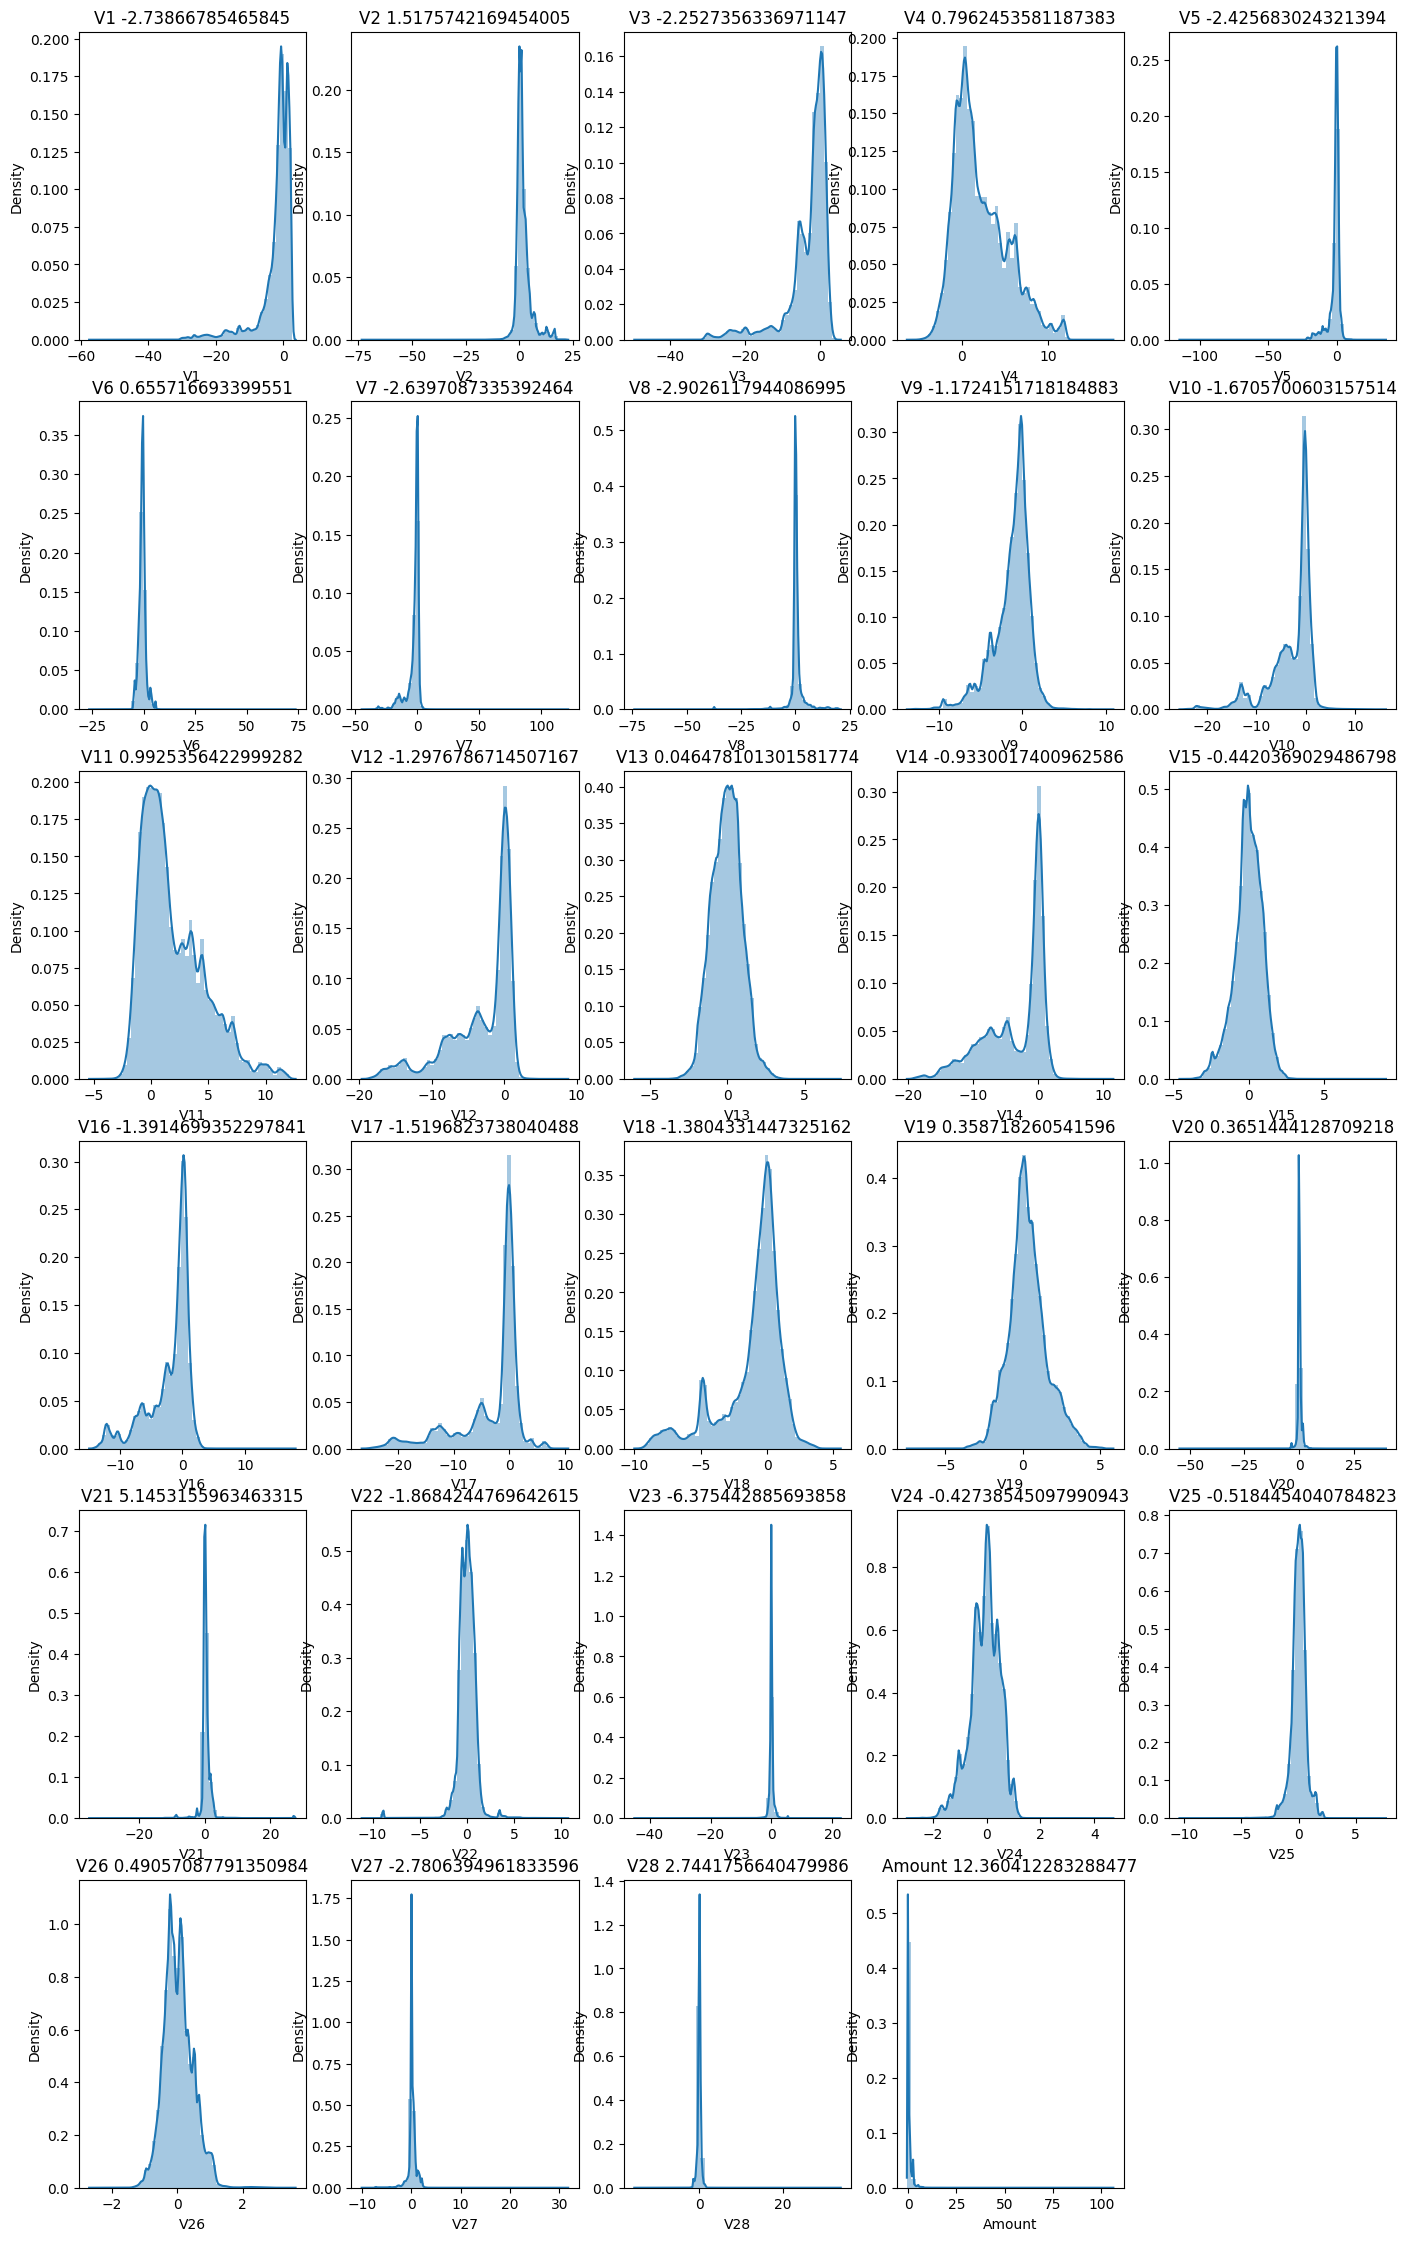

In [ ]:
# Plotting the distribution of the variables of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :
    k=k+1
    plt.subplot(6, 5,k)
    sns.distplot(X_train_resampled[col])
    plt.title(col+' '+str(X_train_resampled[col].skew()))

We see that there are many variables, which are heavily skewed. We will mitigate the skewness only for those variables and bring them into normal distribution.

### Reducing skewness using Power Transformation to bring it to the Normal Distribution

In [ ]:
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer

# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)

# Fit and transform the PT on training data
X_train_resampled[cols] = pt.fit_transform(X_train_resampled)

In [ ]:
# Transform the test set
X_test[cols] = pt.transform(X_test)

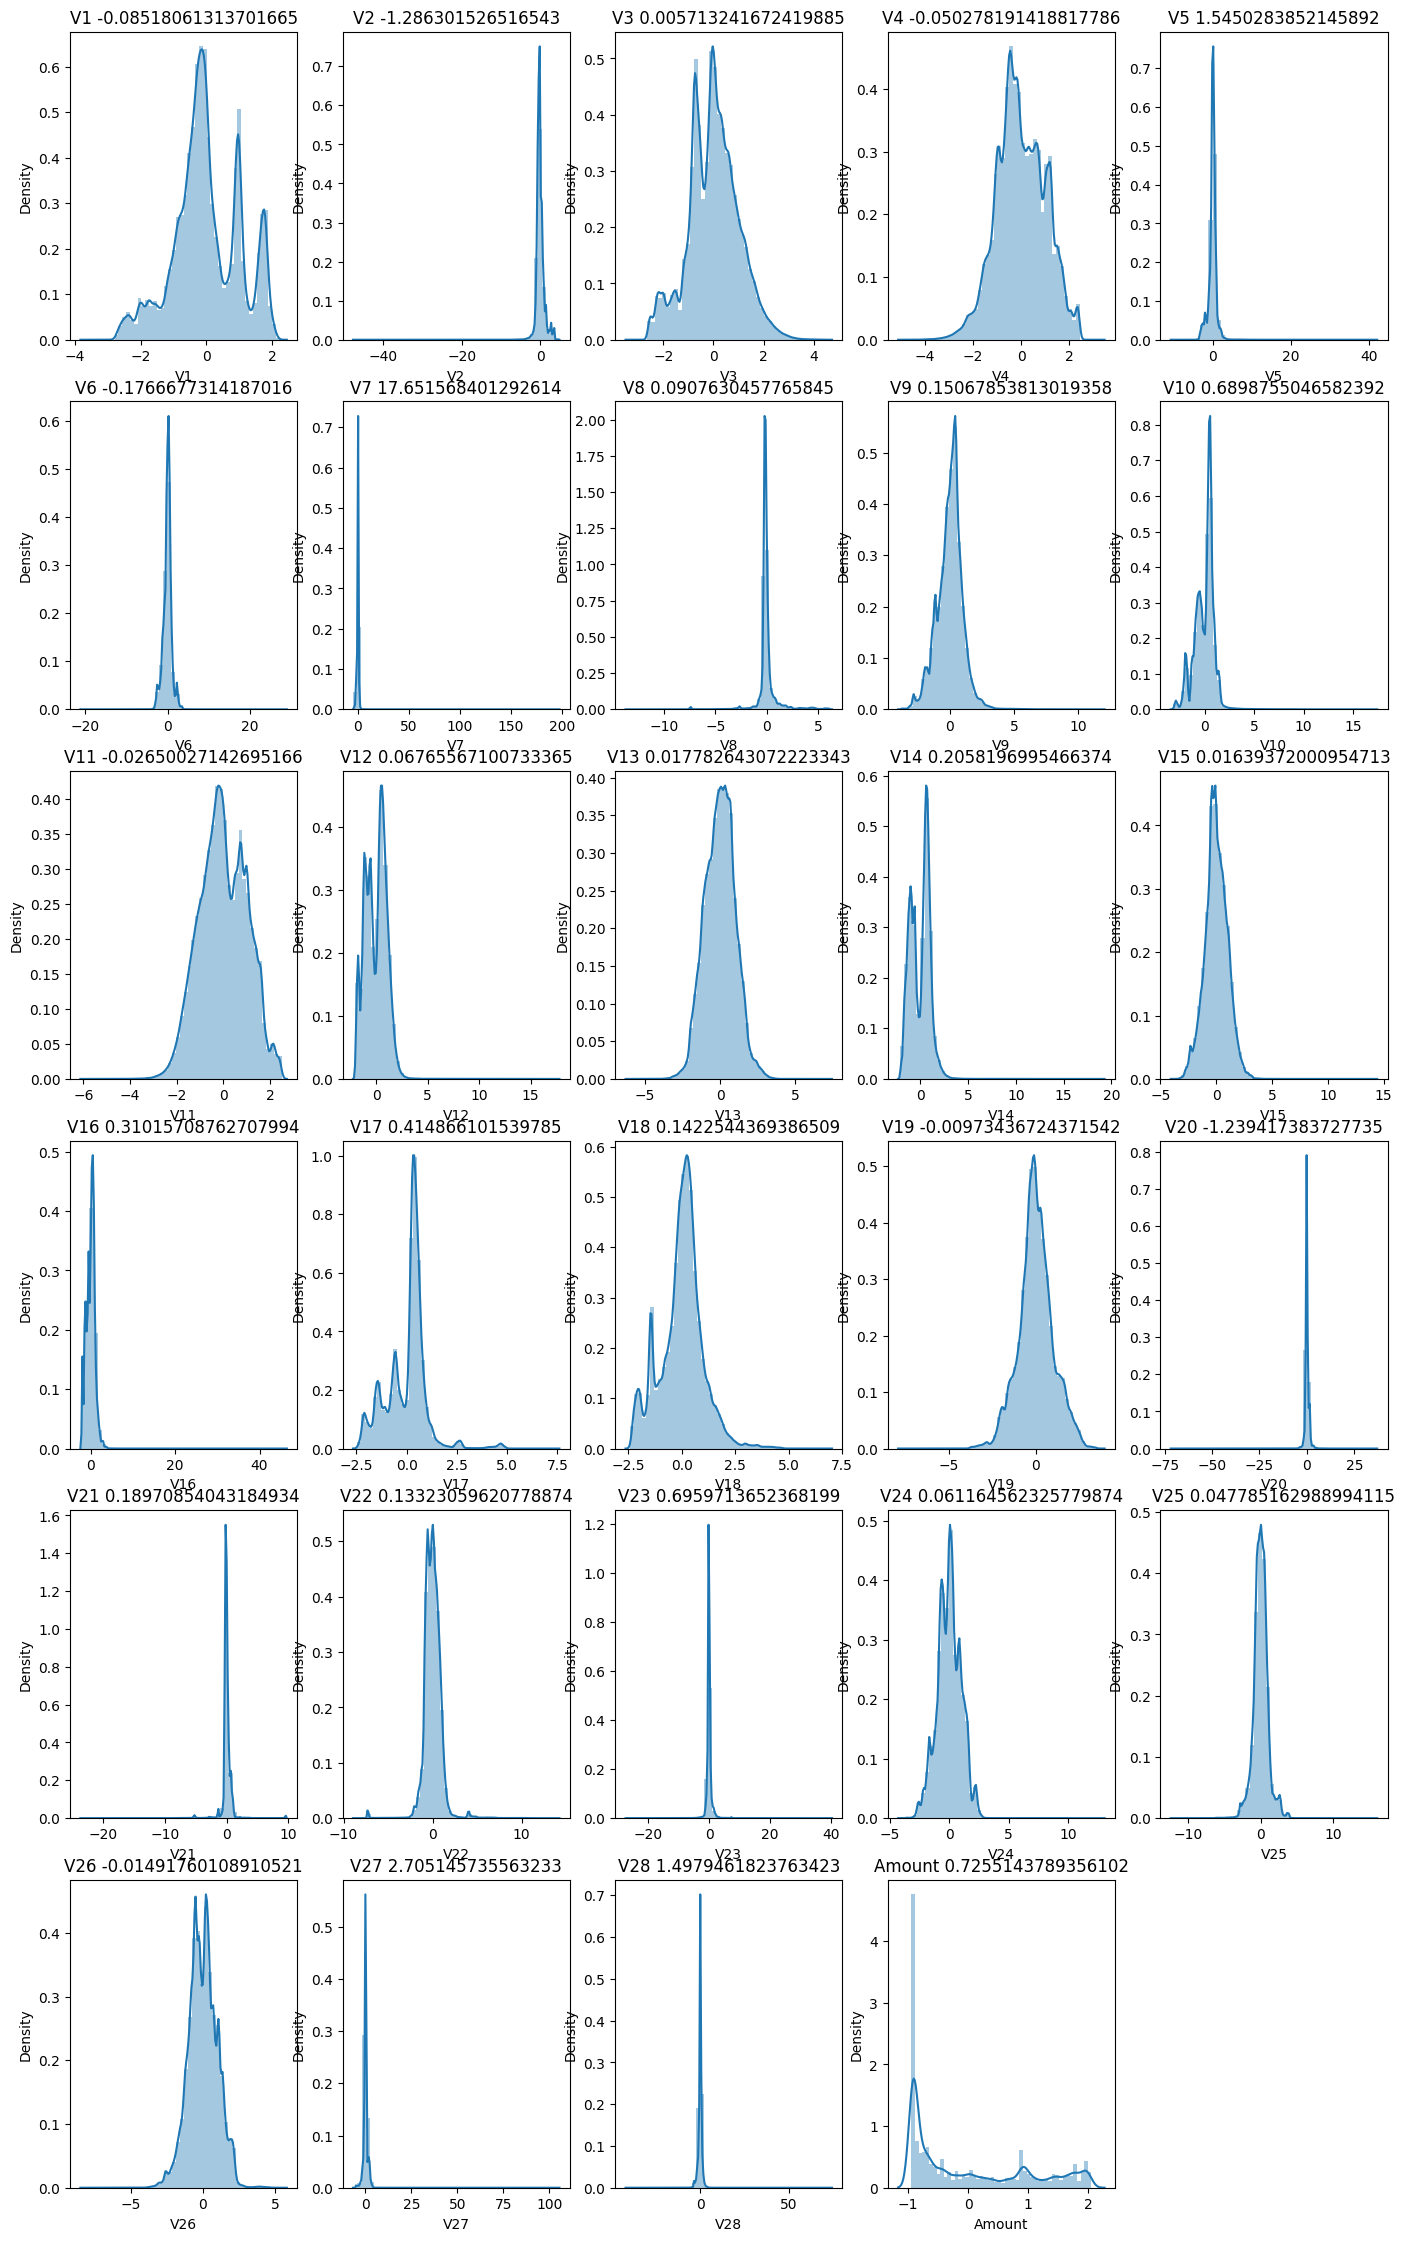

In [ ]:
# Plotting the distribution afte transformation
k=0
plt.figure(figsize=(17,28))
for col in cols :
    k=k+1
    plt.subplot(6, 5,k)
    sns.distplot(X_train_resampled[col])
    plt.title(col+' '+str(X_train_resampled[col].skew()))

Now the variables look normally distributed after the transformation.

In [ ]:
# lets print the shapes again
print("Shape of the X Train :", X_train_resampled.shape)
print("Shape of the y Train :", y_train_resampled.shape)
print("Shape of the X test :", X_test.shape)
print("Shape of the y test :", y_test.shape)

Shape of the X Train : (454902, 29)
Shape of the y Train : (454902,)
Shape of the X test : (56962, 29)
Shape of the y test : (56962,)


## Model Building

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, f1_score, precision_score, recall_score,accuracy_score

Using Multiple models

Logistic Regression, Decision Tree, KNN, Suport Vector Machine, Random Forest

Classifier: Logistic Regression
Precision: 0.06470588235294118
Recall: 0.8979591836734694
F1 Score: 0.12071330589849111


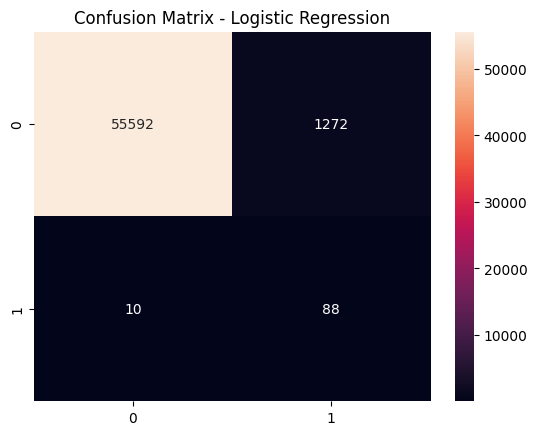

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.90      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.98      0.99     56962

Classifier: Decision Tree
Precision: 0.4262295081967213
Recall: 0.7959183673469388
F1 Score: 0.5551601423487544


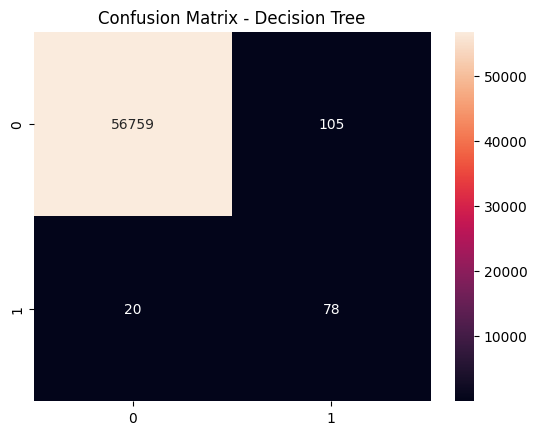

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.43      0.80      0.56        98

    accuracy                           1.00     56962
   macro avg       0.71      0.90      0.78     56962
weighted avg       1.00      1.00      1.00     56962

Classifier: KNN
Precision: 0.48823529411764705
Recall: 0.8469387755102041
F1 Score: 0.6194029850746269


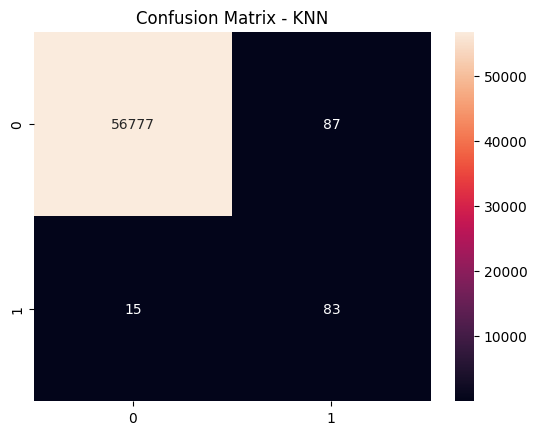

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.49      0.85      0.62        98

    accuracy                           1.00     56962
   macro avg       0.74      0.92      0.81     56962
weighted avg       1.00      1.00      1.00     56962

Classifier: Support Vector Machine
Precision: 0.3025830258302583
Recall: 0.8367346938775511
F1 Score: 0.44444444444444436


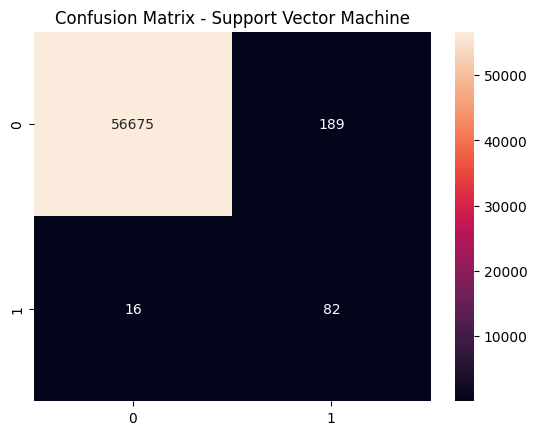

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.30      0.84      0.44        98

    accuracy                           1.00     56962
   macro avg       0.65      0.92      0.72     56962
weighted avg       1.00      1.00      1.00     56962

Classifier: Random Forest
Precision: 0.8936170212765957
Recall: 0.8571428571428571
F1 Score: 0.875


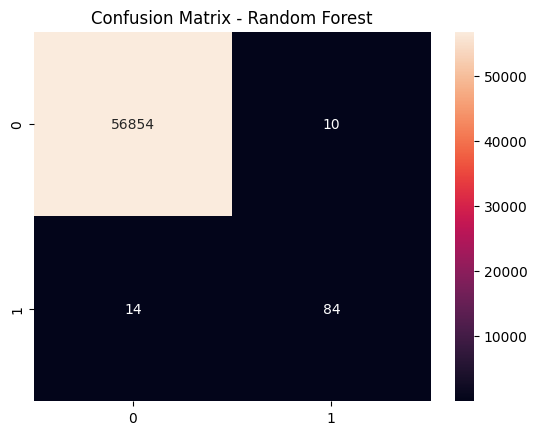

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.86      0.88        98

    accuracy                           1.00     56962
   macro avg       0.95      0.93      0.94     56962
weighted avg       1.00      1.00      1.00     56962

Scores: {'Logistic Regression': {'precision_score': 0.06470588235294118, 'recall_score': 0.8979591836734694, 'f1_score': 0.12071330589849111}, 'Decision Tree': {'precision_score': 0.4262295081967213, 'recall_score': 0.7959183673469388, 'f1_score': 0.5551601423487544}, 'KNN': {'precision_score': 0.48823529411764705, 'recall_score': 0.8469387755102041, 'f1_score': 0.6194029850746269}, 'Support Vector Machine': {'precision_score': 0.3025830258302583, 'recall_score': 0.8367346938775511, 'f1_score': 0.44444444444444436}, 'Random Forest': {'precision_score': 0.8936170212765957, 'recall_score': 0.8571428571428571, 'f1_score': 0.875}}


In [ ]:
## Initialize a list of classifiers
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
     ('KNN', KNeighborsClassifier()),
    ('Support Vector Machine', SVC()),
    ('Random Forest',RandomForestClassifier())]

scores = {}

for name, classifier in classifiers:
    classifier.fit(X_train_resampled, y_train_resampled)
    y_pred = classifier.predict(X_test)

    # Make predictions on the test data
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    scores[name] = {
        'precision_score': precision,
        'recall_score': recall,
        'f1_score': f1
    }

    print("Classifier:", name)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    report = classification_report(y_test, y_pred)
    print("Classification Report:\n", report)

    print("==========================================")

# Print the final scores dictionary
print("Scores:", scores)

In [ ]:
#Create a DataFrame from the results
scores_df = pd.DataFrame(scores).T

# Print the scores DataFrame
print(scores_df)

                        precision_score  recall_score  f1_score
Logistic Regression            0.064706      0.897959  0.120713
Decision Tree                  0.426230      0.795918  0.555160
KNN                            0.488235      0.846939  0.619403
Support Vector Machine         0.302583      0.836735  0.444444
Random Forest                  0.893617      0.857143  0.875000


# **Observations**

**Logistic Regression** : High recall indicates that it captures a significant proportion of fraudulent transactions but at the cost of low precision. It generates many false positives.

**Decision Tree** : Offers a balanced performance with reasonably good precision and recall. It's a promising option

**KNN** : Provides a good balance between precision and recall, making it a strong contender.

**SVM** : Offers a good recall but at the cost of lower precision. The F1 score is moderate.

**Random Forest** : Random Forest demonstrates excellent precision, recall, and F1 score. It achieves a balance between high precision and recall, making it a strong performer.

## Hyperparameter Tuning using Gridsearch CV

Let us perform Hyper parameter Tuning using Grid search CV for the Random Forest classifier to further improve the model's performance

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold

In [ ]:
# Define the hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20, 30]}

In [ ]:
# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    cv=5,  # Number of cross-validation folds
    scoring='f1' )

In [ ]:
# Fit the GridSearchCV to your data
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [50, 100]},
             scoring='f1')

In [ ]:
# Get the best model
best_rf_model = grid_search.best_estimator_

In [ ]:
# Evaluate the best model on the test set
y_pred_best = best_rf_model.predict(X_test)

In [ ]:
# Calculate and print precision, recall, and F1 score
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

In [ ]:
print("Best Random Forest Model - Precision:", precision_best)
print("Best Random Forest Model - Recall:", recall_best)
print("Best Random Forest Model - F1 Score:", f1_best)

Best Random Forest Model - Precision: 0.8947368421052632
Best Random Forest Model - Recall: 0.8673469387755102
Best Random Forest Model - F1 Score: 0.8808290155440415


The Random Forest model's precision, recall, and F1 score improved after hyperparameter tuning, indicating that it now has a better balance between precision and recall, resulting in a higher F1 score. This suggests that the Random Forest model with hyperparameter tuning is likely a strong candidate for your classification problem.

This model is better at avoiding false positives, meaning it's less likely to flag legitimate transactions as fraudulent. This is a key consideration for a credit card fraud detection system, as incorrectly flagging legitimate transactions can lead to customer inconvenience and frustration.


# Conslusion:

In this analysis, we developed a classification model to predict whether a financial transaction is fraudulent or not, a critical task for safeguarding the interests of both customers and the business. The target variable in the dataset was highly imbalanced, with only a small fraction of transactions being fraudulent. To address this, we employed several techniques like SMOTE to preprocess the data, balance the classes, and fine-tune the model.

The initial model performance showed promise, with Random Forest exhibiting the highest F1 score. However, recognizing that model performance could be further improved, we proceeded to hyperparameter tuning using GridSearchCV. The hyperparameter tuning led to a substantial enhancement in the Random Forest model's performance, achieving an F1 score of 0.8808, with balanced precision and recall.

In summary, the choice of precision, recall, and F1 score as the evaluation metrics directly addresses the business's KPIs by striking a balance between identifying fraudulent transactions and reducing the costs and risks associated with misclassifications. The hyperparameter-tuned Random Forest model, with its enhanced performance, is well-suited to serve the business's objectives in fraud detection.